In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-ab-testing/marketing_AB.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/marketing-ab-testing/marketing_AB.csv')

In [4]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
df.duplicated(subset='user id').sum()

0

#### There aro no duplicated user ids. This column as well as the 'Unnamed: 0' column are not valuable variables in terms of prediction. So, we can drop them

In [7]:
df = df.drop(columns=['Unnamed: 0', 'user id'])

In [8]:
# Changing the names of columns into snake format for convinience
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.columns 

Index(['test_group', 'converted', 'total_ads', 'most_ads_day',
       'most_ads_hour'],
      dtype='object')

### Lets conduct a univariate analysis

In [10]:
df.head()

,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


#### If we take a look at the data we have, we can see that all columns besides 'total_ads' are categorical.  The 'most_ads_hour' is also a categorical one with 24 levels, even though it is represented by int dtype. In nature, it is a categorical column

In [11]:
categorical = df[['test_group', 'converted', 'most_ads_day', 'most_ads_hour']]

In [12]:
# Defining a function for visualizations 
def plotting_categrical(df):
    for col in df.columns:
        # building a count plot
        plt.figure(figsize=(8,5))
        plt.subplot(1, 2, 1)
        sns.countplot(x=col, data=df,order=df[col].value_counts().index)
        plt.title(f'Count plot - {col}')
        if df[col].nunique() > 6:
            plt.xticks(rotation=90)
    
        
        # Pie chart
        if df[col].nunique() < 12:
            plt.subplot(1, 2, 2)
            counts = df[col].value_counts()
            plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
            plt.title(f'Pie chart - {col}')
        
        plt.show()       

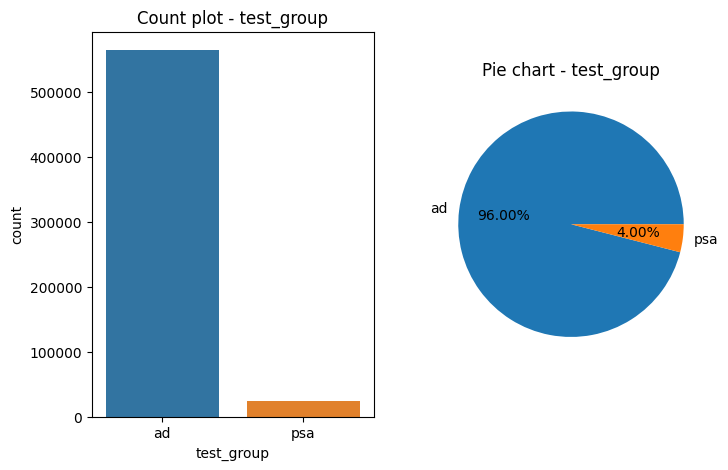

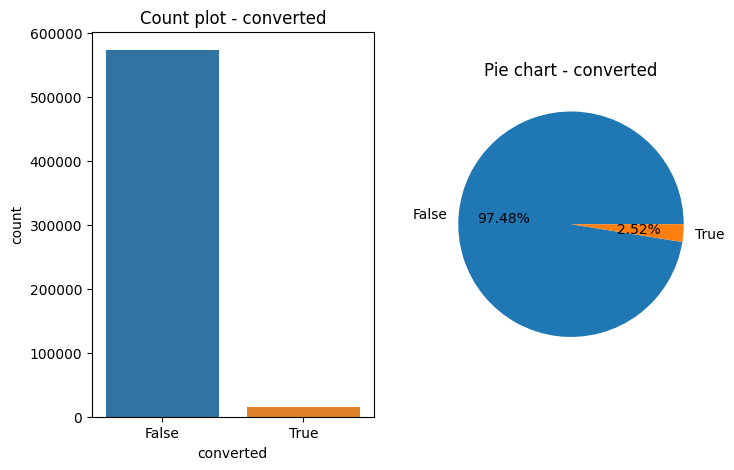

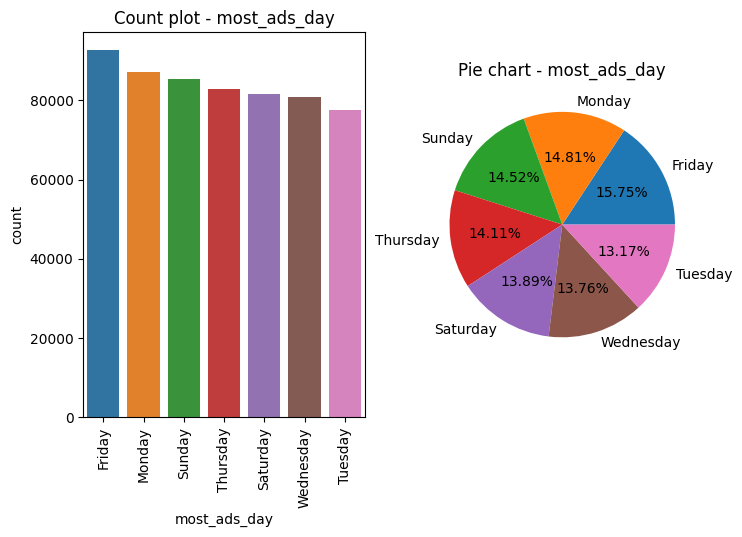

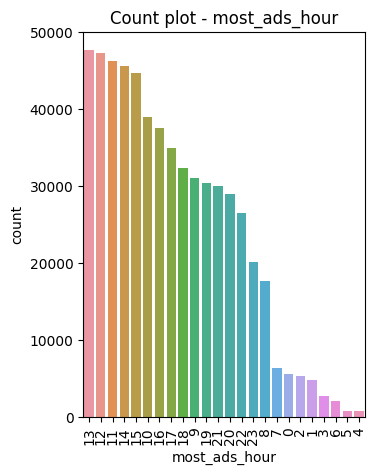

In [13]:
# Using the function to build count plots and pie charts 
plotting_categrical(categorical)

#### Now, lets check the distribution of the only numerical variable

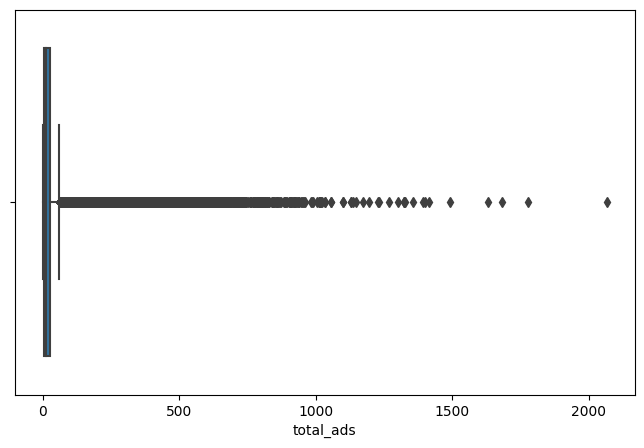

In [14]:
# building a box plot 
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='total_ads')
plt.show()

##### We can see a lot of outliers. Lets build a box lot without them to have a better picture

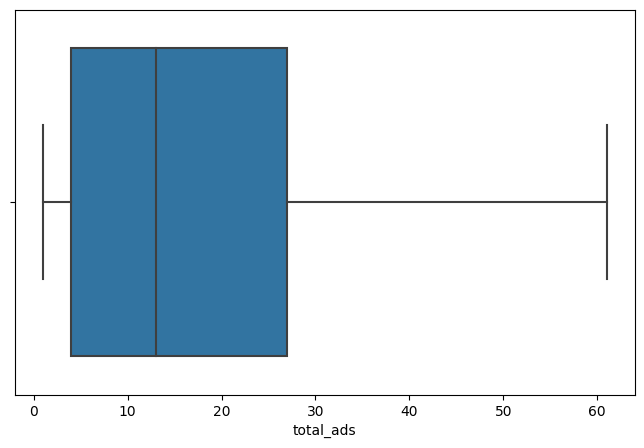

In [15]:
# box plot without outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='total_ads', showfliers=False)
plt.show()

In [16]:
df['total_ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total_ads, dtype: float64

### Bivariate analysis

In [17]:
# defining a function for building visuals for bivariate analysis
def plotting_bivariate(df, target: str):
    for col in df.columns:
        if col in categorical and col != target:
            cross = pd.crosstab(index=df[col], columns=df[target], normalize='index')
            cross = cross.sort_values(by=True, ascending=False)
            print(cross)
            cross.plot(kind='bar', stacked=True, title=f'Conversion Distribution by {col}')

        elif col not in categorical:
            sns.boxplot(x=target, y=col, data=df, showfliers=False)
            plt.title(f'Conversion distribution by {col}')

        plt.show()

converted      False     True 
test_group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


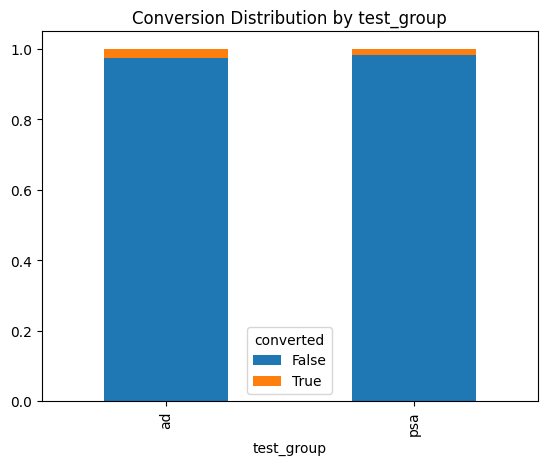

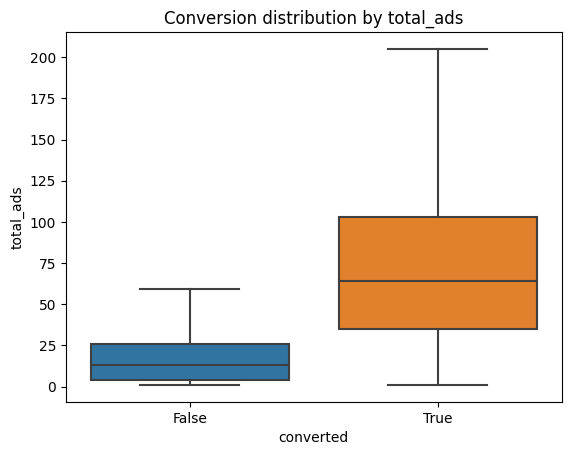

converted        False     True 
most_ads_day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


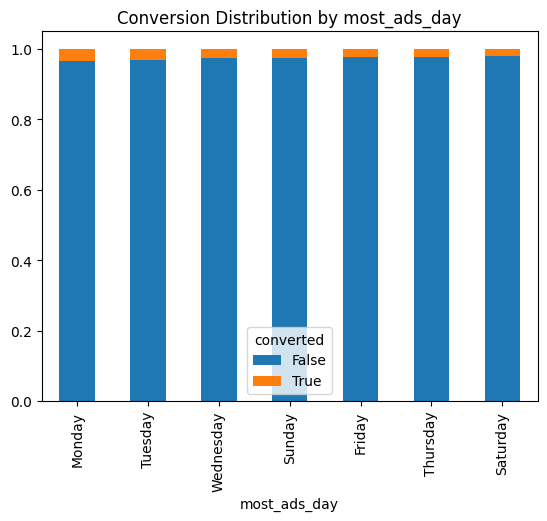

converted         False     True 
most_ads_hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


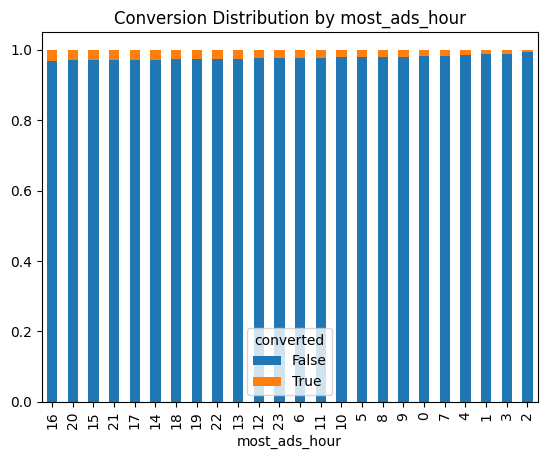

In [18]:
# using the function
plotting_bivariate(df, 'converted')

#### 1. The conversion rate for the group that was shown the ad is about 2.5%, while for the other group it is around 1.8%. The statistical significance of this difference will be tested later. 

#### 2. The box plot of conversion distribution by total_ads shows that a higher number of ads shown leads to a higher conversion rate.

#### 3. The conversion distribution by day of the week shows that ads displayed on Monday result in a higher conversion rate of approximately 3.2%, whereas ads shown on Saturday yield a lower rate of around 2.1%

#### 4. The conversion rate by hour of the day indicates that ad impressions during the late afternoon and evening (15:00–22:00) yield higher conversion rates, peaking at 3.08% around 16:00. Conversely, early morning hours (00:00–04:00) show markedly lower conversion rates, with the lowest observed at 0.73% at 02:00.

### Statistical tests

#### Since we are going to examine the dependency of 2 categorical variables, we will be using a Chi Squared Test of independence. 


In [19]:
# importing required libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [20]:
# we have a dataset of only categorical variables
categorical.head()

,test_group,converted,most_ads_day,most_ads_hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


#### Before conducting a Chi squared test lets state the null and alternative hypotheses for each pair of feature and the target.

#### 1. test_group vs. converted

##### Null Hypothesis H0: There is no association between test_group and converted. (Conversion is independent of ad exposure.)

##### Alternative Hypothesis Ha: There is an association between test_group and converted. (Conversion depends on whether the user saw ads.)

#### 2. most_ads_day vs. converted

##### Null Hypothesis H0: There is no association between most_ads_day and converted. (Conversion is independent of the day ads were most shown.)

##### Alternative Hypothesis Ha: There is an association between most_ads_day and converted. (Conversion depends on which day had the most ads.)

#### 3. most_ads_hour vs. converted

##### Null Hypothesis H0: There is no association between most_ads_hour and converted. (Conversion is independent of the hour ads were most shown.)

##### Alternative Hypothesis Ha: There is an association between most_ads_hour and converted. (Conversion depends on the hour of ad exposure.)

In [21]:
# Lets set the significance level of 5%
alpha = 0.05

In [22]:
# creating a function for conducting a Chi squared test of independence
def multy_chi2_test(df, target: str):
    for col in df.columns:
        if col != target:

            # Creating a contingency table
            contingency_table = pd.crosstab(df[col], df[target])

            # Performing a Chi squared test
            Chi2, p_value, _, _ = chi2_contingency(contingency_table)

            # Showing the results
            print(f'\nChi-squared Test for {col} vs {target}:')
            print(f'Chi_squared value:------{Chi2}')
            print(f'P value:----------------{p_value}')  

            # Checking the statistical significance
            if p_value < alpha:
                print(f'There is a statistically significant difference in conversion rates accross {col}')
                print('We reject the Null hypothesis H0')
            else:
                print(f'There is no a statistically significant difference in conversion rates accross {col}')
                print('We fail to reject the Null hypothesis H0')


In [23]:
# lets run the Chi squared test for categorical features
multy_chi2_test(categorical, 'converted')


Chi-squared Test for test_group vs converted:
Chi_squared value:------54.005823883685245
P value:----------------1.9989623063390075e-13
There is a statistically significant difference in conversion rates accross test_group
We reject the Null hypothesis H0

Chi-squared Test for most_ads_day vs converted:
Chi_squared value:------410.0478857936585
P value:----------------1.932184379244731e-85
There is a statistically significant difference in conversion rates accross most_ads_day
We reject the Null hypothesis H0

Chi-squared Test for most_ads_hour vs converted:
Chi_squared value:------430.7686923082209
P value:----------------8.027629823696541e-77
There is a statistically significant difference in conversion rates accross most_ads_hour
We reject the Null hypothesis H0


#### Lets summarize the results
##### We conducted three tests to examine whether certain categorical features are associated with conversion behavior. In all cases, the results were statistically significant, indicating that the features are not independent of conversion

##### Ad exposure (test_group) has a meaningful impact on conversion—users who saw ads had a higher chance to buy a product.

##### Timing of ad exposure, both by day and hour, is also strongly linked to conversion outcomes.

##### These results suggest that not only whether users see ads matters, but also when they see them.

#### Now we have a continuous variable total_ads for which we have to conduct an analysis

#### Null Hypothesis H0: The mean number of ads seen is the same for both groups. 

#### Alternative Hypothesis Ha: The mean number of ads seen is different between the two groups.

#### We will use Welch’s t-test because our sample sizes are large and unequal, and variances may differ. Thanks to the Central Limit Theorem, we don’t need to test for normality—the sampling distribution of the mean becomes approximately normal with large sample sizes, even if the underlying data is skewed.

In [24]:
from scipy.stats import ttest_ind

In [25]:
# Dividing data into 2 samples
sample_1 = df[df['converted'] == False]['total_ads']
sample_2 = df[df['converted'] == True]['total_ads']

In [26]:
# Performing a Welch's t test
t_statistic, p_value = ttest_ind(sample_1, sample_2, equal_var=False)
print(f't-statistics: {t_statistic}, p-value: {p_value}')

t-statistics: -84.17740664633055, p-value: 0.0


#### Since the p-value is very small (less than 0.05), we reject the null hypothesis (H₀) and conclude that there is a statistically significant difference in the mean number of ads shown between the two groups.